# Comportement de la roue Cyr

## Variation de différents paramètres

In [80]:
from IPython.display import Image
from IPython.core.display import HTML
import math as ma
import matplotlib.pyplot as plt
import numpy as np



# Paramètres:

- Ea, Ec: Modules de Young acier et composite
- rhoa, rhoc: masses volumiques
- W: Force appliquée
- R: rayon médian de la roue
<br>
<br>
- section circulaire:
 - r1: rayon interne
 - r2: rayon externe
<br>
<br>
- section elliptique
 - a: demi grand axe externe
 - c: demi grand axe interne
 - b: demi petit axe externe
 - d: demi petit axe interne
 
<img src="https://i.ibb.co/bPBdCpP/cir.png" alt="cir" width="100" height="100"></a>
<img src="https://i.ibb.co/1nWB1j2/ell.png" alt="ell" width="200" height="100"></a>

In [81]:
Ea=210.0*10**9
Ec=9.0*10**9
rhoa=7800
rhoc=1170
W=900
R=0.9375

r1=0.0125
r2=0.0175

a=0.03
b=0.0175
c=0.025
d=0.0125

$\delta=\frac{F}{k}$
<br>
$ H_{max}=\frac{1}{2} (\frac{F^2}{m_rkg}-\frac{m_rg}{4k})$
<br>
$\frac{E_{p, gravitationnelle}}{E_{tot}}=1-\frac{(m_rg)^2}{4F^2} $


In [82]:
g=9.81
co=0.5

Ic=ma.pi*0.25*(r2**4-r1**4)
Ac=ma.pi*(r2**2-r1**2)
cc=Ic/(Ac*R**2)

#Ixe=I cas 1 ellipse,Iye: cas 2

Ixe=ma.pi*0.25*(a*b**3-c*d**3)
Iye=ma.pi*0.25*(b*a**3-d*c**3)
Ae=ma.pi*(a*b-c*d)
ce1=Ixe/(Ae*R**2)
ce2=Iye/(Ae*R**2)


def mr(rho,A):
    return(2*ma.pi*rho*A*R)

m1ac=co*mr(rhoa,Ac)
m2ac=(1-co)*mr(rhoa,Ac)
m1cc=co*mr(rhoc,Ac)
m2cc=(1-co)*mr(rhoc,Ac)
m1ce=co*mr(rhoc,Ae)
m2ce=(1-co)*mr(rhoc,Ae)

L=2*R

kac=4*ma.pi*Ea*Ic/((ma.pi**2 -8)*R**3)
wac=ma.sqrt(kac*(m1ac+m2ac)/m1ac*m2ac)

kcc=4*ma.pi*Ec*Ic/((ma.pi**2 -8)*R**3)
wcc=ma.sqrt(kcc*(m1cc+m2cc)/m1cc*m2cc)

kce1=4*ma.pi*Ec*Ixe/((ma.pi**2 -8)*R**3)
wce1=ma.sqrt(kce1*(m1ce+m2ce)/m1ce*m2ce)

kce2=4*ma.pi*Ec*Iye/((ma.pi**2 -8)*R**3)
wce2=ma.sqrt(kce2*(m1ce+m2ce)/m1ce*m2ce)




t=np.linspace(0.0,3.0,10000)


def Hmax(F,k,m):
    m1=co*m
    m2=(1-co)*m
    res=0.5*((F**2-(m2*g)**2-2*m1*(m1+m2)*g**2)/(2*m1*k*g) + ((m1+m2)*g)/k )
    return (res)


def fEpg(F,k,m):
    m1 = co * m
    m2 = (1 - co) * m
    return((m*g*(Hmax(F,k,m)))/((0.5*F**2)/k))
    #return(((m1+m2)*g/(F**2))*((F**2+(m2*g)**2)/(2*m1*g) + (m2*g) +F))

def delta(F,k):
    return(F/k)

In [83]:
print('delta_ac='+str(np.around(delta(W,kac),3)))

print('delta_cc='+str(np.around(delta(W,kcc),3)))

print('delta_ce1='+str(np.around(delta(W,kce1),3)))

print('delta_ce2='+str(np.around(delta(W,kce2),3)))

delta_ac=0.01
delta_cc=0.225
delta_ce1=0.139
delta_ce2=0.056


In [84]:
print('Hmaxac=' + str(np.around(Hmax(W,kac,mr(rhoa,Ac)),3)))

print('Hmaxcc='+ str(np.around(Hmax(W,kcc,mr(rhoc,Ac)),3)))

print('Hmaxce1=' + str(np.around(Hmax(W,kce1,mr(rhoc,Ae)),3)))

print('Hmaxce2=' + str(np.around(Hmax(W,kce2,mr(rhoc,Ae)),3)))


Hmaxac=0.02
Hmaxcc=3.177
Hmaxce1=1.389
Hmaxce2=0.561


In [85]:
print('Epg/Etot acier=' + str(np.around(fEpg(W,kac,mr(rhoa,Ac)),4)))

print('Epg/Etot composite section circulaire='+str(np.around(fEpg(W,kcc,mr(rhoc,Ac)),4)))

print('Epg/Etot composite section elliptique 1='+str(np.around(fEpg(W,kce1,mr(rhoc,Ae)),4)))

print('Epg/Etot composite section elliptique 2='+str(np.around(fEpg(W,kce2,mr(rhoc,Ae)),4)))


Epg/Etot acier=0.9861
Epg/Etot composite section circulaire=0.9997
Epg/Etot composite section elliptique 1=0.9994
Epg/Etot composite section elliptique 2=0.9994


In [86]:
def HmaxFac(F):
    return(Hmax(F,kac,mr(rhoa,Ac)))

def HmaxFcc(F):
    return(Hmax(F,kcc,mr(rhoc,Ac)))

def HmaxFce1(F):
    return(Hmax(F,kce1,mr(rhoc,Ae)))

def HmaxFce2(F):
    return(Hmax(F,kce2,mr(rhoc,Ae)))

def Hmaxkac(k):
    return(Hmax(W,k,mr(rhoa,Ac)))

def Hmaxkcc(k):
    return(Hmax(W,k,mr(rhoc,Ac)))

def Hmaxkce1(k):
    return(Hmax(W,k,mr(rhoc,Ae)))

def Hmaxkce2(k):
    return(Hmax(W,k,mr(rhoc,Ae)))

def Hmaxmac(m):
    return(Hmax(W,kac,m))

def Hmaxmcc(m):
    return(Hmax(W,kcc,m))

def Hmaxmce1(m):
    return(Hmax(W,kce1,m))

def Hmaxmce2(m):
    return(Hmax(W,kce2,m))


def fEpgmac(m):
    return(fEpg(W,kac,m))

def fEpgmcc(m):
    return(fEpg(W,kcc,m))

def fEpgmce1(m):
    return(fEpg(W,kce1,m))

def fEpgmce2(m):
    return(fEpg(W,kce2,m))

def fEpgFac(F):
    return(fEpg(F,kac,mr(rhoa,Ac)))

def fEpgFcc(F):
    return(fEpg(F,kcc,mr(rhoc,Ac)))

def fEpgFce1(F):
    return(fEpg(F,kce1,mr(rhoc,Ae)))

def fEpgFce2(F):
    return(fEpg(F,kce2,mr(rhoc,Ae)))


Fx=np.linspace(0.01,5000.0,10000)
kx=np.linspace(0.01,10.0**5,10000)
mx=np.linspace(0.01,25.0,10000)

Fx2=np.linspace(0.01,50000.0,10000)
kx2=np.linspace(0.01,10.0**5,100000)
kx2ac=np.linspace(0.01,10.0**6,1000000)
mx2=np.linspace(0.01,250.0,10000)

# $H_{max}$ en fonction de la force appliquée

### Valeurs minimales:
<br>
Pour que le modèle soit valide il faut qu’il y ait un saut, donc que: 
$$
\frac{F^2}{2k} > m_rg(\frac{L}{2}-\frac{1}{2}(L-\frac{m_rg}{2L}))
$$

C'est à dire:

$$
F > \frac{m_rg}{\sqrt{2}}
$$

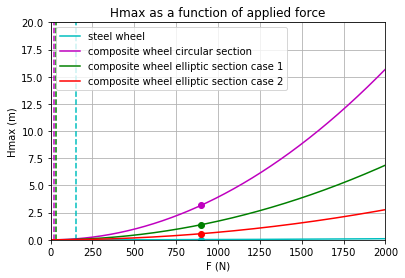

In [87]:
plt.plot(Fx,HmaxFac(Fx),'c',label='steel wheel')
plt.plot(Fx,HmaxFcc(Fx),'m',label='composite wheel circular section')
plt.plot(Fx,HmaxFce1(Fx),'g',label='composite wheel elliptic section case 1')
plt.plot(Fx,HmaxFce2(Fx),'r',label='composite wheel elliptic section case 2')

plt.plot(W,Hmax(W,kac,mr(rhoa,Ac)),'co')
plt.plot(W,Hmax(W,kcc,mr(rhoc,Ac)),'mo')
plt.plot(W,Hmax(W,kce1,mr(rhoc,Ae)),'go')
plt.plot(W,Hmax(W,kce2,mr(rhoc,Ae)),'ro')

plt.vlines(mr(rhoa,Ac)*g/np.sqrt(2),0.0,25.0, 'c',linestyle='--')
plt.vlines(mr(rhoc,Ac)*g/np.sqrt(2),0.0,25.0, 'm',linestyle='--')
plt.vlines(mr(rhoc,Ae)*g/np.sqrt(2),0.0,25.0, 'g',linestyle='--')

plt.xlim((0,2000))
plt.ylim((0,20))

plt.xlabel('F (N)')
plt.ylabel('Hmax (m)')
plt.legend(loc='best')
plt.title('Hmax as a function of applied force')
plt.grid()
plt.show()

# $H_{max}$ en fonction de la raideur

### Valeurs minimales:
<br>
Pour que le modèle soit valide il faut que le ressort puisse soutenir la masse 1: 
$$
\frac{m_1g}{k} < L
$$

C'est à dire:

$$
k > \frac{m_rg}{2L}
$$

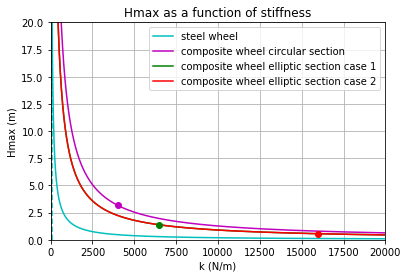

In [88]:
plt.plot(kx,Hmaxkac(kx),'c',label='steel wheel')
plt.plot(kx,Hmaxkcc(kx),'m',label='composite wheel circular section')
plt.plot(kx,Hmaxkce1(kx),'g',label='composite wheel elliptic section case 1')
plt.plot(kx,Hmaxkce2(kx),'r',label='composite wheel elliptic section case 2')

plt.plot(kac,Hmax(W,kac,mr(rhoa,Ac)),'co')
plt.plot(kcc,Hmax(W,kcc,mr(rhoc,Ac)),'mo')
plt.plot(kce1,Hmax(W,kce1,mr(rhoc,Ae)),'go')
plt.plot(kce2,Hmax(W,kce2,mr(rhoc,Ae)),'ro')

plt.vlines(mr(rhoa,Ac)*g/(2*L),0.0,30000.0, 'c',linestyle='--')
plt.vlines(mr(rhoc,Ac)*g/(2*L),0.0,30000.0, 'm',linestyle='--')
plt.vlines(mr(rhoc,Ae)*g/(2*L),0.0,30000.0, 'g',linestyle='--')

plt.xlim((0,20000))
plt.ylim((0,20))

plt.xlabel('k (N/m)')
plt.ylabel('Hmax (m)')
plt.legend(loc='best')
plt.title('Hmax as a function of stiffness')
plt.grid()
plt.show()


# $H_{max}$ en fonction de la masse de la roue

### Valeurs minimales:
<br>
Dans notre situation, réduire la masse équivaut à diminuer l'épaisseur de la section et donc à la rendre plus fragile: il existe une valeur de la masse en dessous de laquelle il y aura rupture. 
<br>
Pour $r_2$ variant de 1.5 à 5 cm on a déterminé que:
$$
m_{min}=2.8 kg
$$



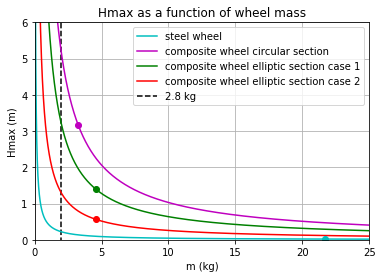

In [89]:
plt.plot(mx,Hmaxmac(mx),'c',label='steel wheel')
plt.plot(mx,Hmaxmcc(mx),'m',label='composite wheel circular section')
plt.plot(mx,Hmaxmce1(mx),'g',label='composite wheel elliptic section case 1')
plt.plot(mx,Hmaxmce2(mx),'r',label='composite wheel elliptic section case 2')

plt.plot(mr(rhoa,Ac),Hmax(W,kac,mr(rhoa,Ac)),'co')
plt.plot(mr(rhoc,Ac),Hmax(W,kcc,mr(rhoc,Ac)),'mo')
plt.plot(mr(rhoc,Ae),Hmax(W,kce1,mr(rhoc,Ae)),'go')
plt.plot(mr(rhoc,Ae),Hmax(W,kce2,mr(rhoc,Ae)),'ro')

plt.vlines(2.0,-0.1,6.0,'k',linestyle='--',label='2.8 kg')

plt.xlim((0,25))
plt.ylim((0,6))

plt.xlabel('m (kg)')
plt.ylabel('Hmax (m)')
plt.legend(loc='best')
plt.title('Hmax as a function of wheel mass')
plt.grid()
plt.show()

# $\frac{E_{p,gravitationnelle}}{E_{tot}}$ en fonction de la force appliquée

### Valeurs minimales:
<br>
Pour que le modèle soit valide il faut qu’il y ait un saut, donc que: 
$$
\frac{F^2}{2k} > m_rg(\frac{L}{2}-\frac{1}{2}(L-\frac{m_rg}{2L}))
$$

C'est à dire:

$$
F > \frac{m_rg}{\sqrt{2}}
$$

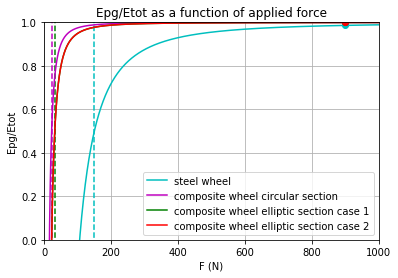

In [90]:
plt.plot(Fx,fEpgFac(Fx),'c',label='steel wheel')
plt.plot(Fx,fEpgFcc(Fx),'m',label='composite wheel circular section')
plt.plot(Fx,fEpgFce1(Fx),'g',label='composite wheel elliptic section case 1')
plt.plot(Fx,fEpgFce2(Fx),'r',label='composite wheel elliptic section case 2')

plt.plot(W,fEpg(W,kac,mr(rhoa,Ac)),'co')
plt.plot(W,fEpg(W,kcc,mr(rhoc,Ac)),'mo')
plt.plot(W,fEpg(W,kce1,mr(rhoc,Ae)),'go')
plt.plot(W,fEpg(W,kce2,mr(rhoc,Ae)),'ro')

plt.vlines(mr(rhoa,Ac)*g/np.sqrt(2),-5.0,2.0, 'c',linestyle='--')
plt.vlines(mr(rhoc,Ac)*g/np.sqrt(2),-5.0,2.0, 'm',linestyle='--')
plt.vlines(mr(rhoc,Ae)*g/np.sqrt(2),-5.0,2.0, 'g',linestyle='--')

plt.xlim((0,1000))
plt.ylim((0,1))

plt.xlabel('F (N)')
plt.ylabel('Epg/Etot')
plt.legend(loc='best')
plt.title('Epg/Etot as a function of applied force')
plt.grid()
plt.show()


# $\frac{E_{p,gravitationnelle}}{E_{tot}}$ en fonction de la masse de la roue

### Valeurs minimales:
<br>
Dans notre situation, réduire la masse équivaut à diminuer l'épaisseur de la section et donc à la rendre plus fragile: il existe une valeur de la masse en dessous de laquelle il y aura rupture. 
<br>
Pour $r_2$ variant de 1.5 à 5 cm on a déterminé que:
$$
m_{min}=2.8 kg
$$

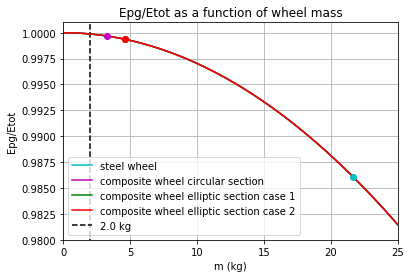

In [91]:
plt.plot(mx,fEpgmac(mx),'c',label='steel wheel')
plt.plot(mx,fEpgmcc(mx),'m',label='composite wheel circular section')
plt.plot(mx,fEpgmce1(mx),'g',label='composite wheel elliptic section case 1')
plt.plot(mx,fEpgmce2(mx),'r',label='composite wheel elliptic section case 2')

plt.plot(mr(rhoa,Ac),fEpg(W,kac,mr(rhoa,Ac)),'co')
plt.plot(mr(rhoc,Ac),fEpg(W,kcc,mr(rhoc,Ac)),'mo')
plt.plot(mr(rhoc,Ae),fEpg(W,kce1,mr(rhoc,Ae)),'go')
plt.plot(mr(rhoc,Ae),fEpg(W,kce2,mr(rhoc,Ae)),'ro')

plt.vlines(2.0,-0.1,6.0,'k',linestyle='--',label='2.0 kg')

plt.xlim((0,25))
plt.ylim((0.98,1.001))

plt.xlabel('m (kg)')
plt.ylabel('Epg/Etot')
plt.legend(loc='best')
plt.title('Epg/Etot as a function of wheel mass')
plt.grid()
plt.show()

# $H_{max}$ en fonction de la force appliquée (ADIMENSIONNEL)

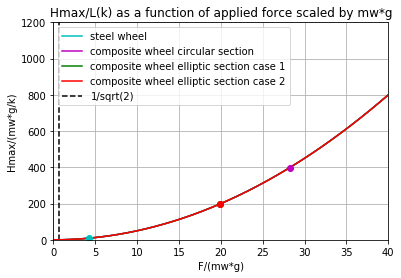

In [92]:
plt.plot(Fx2/(mr(rhoa,Ac)*g),HmaxFac(Fx2)*(kac/(mr(rhoa,Ac)*g)),'c',label='steel wheel')
plt.plot(Fx2/(mr(rhoc,Ac)*g),HmaxFcc(Fx2)*(kcc/(mr(rhoc,Ac)*g)),'m',label='composite wheel circular section')
plt.plot(Fx2/(mr(rhoc,Ae)*g),HmaxFce1(Fx2)*(kce1/(mr(rhoc,Ae)*g)),'g',label='composite wheel elliptic section case 1')
plt.plot(Fx2/(mr(rhoc,Ae)*g),HmaxFce2(Fx2)*(kce2/(mr(rhoc,Ae)*g)),'r',label='composite wheel elliptic section case 2')

plt.plot(W/(mr(rhoa,Ac)*g),Hmax(W,kac,mr(rhoa,Ac))*(kac/(mr(rhoa,Ac)*g)),'co')
plt.plot(W/(mr(rhoc,Ac)*g),Hmax(W,kcc,mr(rhoc,Ac))*(kcc/(mr(rhoc,Ac)*g)),'mo')
plt.plot(W/(mr(rhoc,Ae)*g),Hmax(W,kce1,mr(rhoc,Ae))*(kce1/(mr(rhoc,Ae)*g)),'go')
plt.plot(W/(mr(rhoc,Ae)*g),Hmax(W,kce2,mr(rhoc,Ae))*(kce2/(mr(rhoc,Ae)*g)),'ro')

plt.vlines(1/np.sqrt(2),0.0,5000.0, 'k', label='1/sqrt(2)',linestyle='--')

plt.xlim((0,40))
plt.ylim((0,1200))

plt.xlabel('F/(mw*g)')
plt.ylabel('Hmax/(mw*g/k)')
plt.legend(loc='best')
plt.title('Hmax/L(k) as a function of applied force scaled by mw*g')
plt.grid()
plt.show()

# $H_{max}$ en fonction de la raideur (ADIMENSIONNEL)

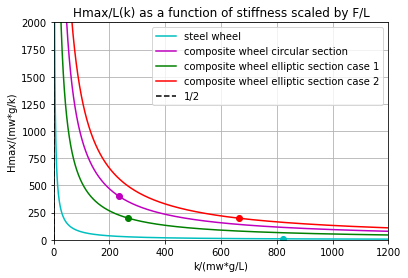

In [93]:
plt.plot(kx2ac*(L/(mr(rhoa,Ac)*g)),Hmaxkac(kx2ac)*(kac/(mr(rhoa,Ac)*g)),'c',label='steel wheel')
plt.plot(kx2*(L/(mr(rhoc,Ac)*g)),Hmaxkcc(kx2)*(kcc/(mr(rhoc,Ac)*g)),'m',label='composite wheel circular section')
plt.plot(kx2*(L/(mr(rhoc,Ae)*g)),Hmaxkce1(kx2)*(kce1/(mr(rhoc,Ae)*g)),'g',label='composite wheel elliptic section case 1')
plt.plot(kx2*(L/(mr(rhoc,Ae)*g)),Hmaxkce2(kx2)*(kce2/(mr(rhoc,Ae)*g)),'r',label='composite wheel elliptic section case 2')

plt.plot(kac/(mr(rhoa,Ac)*g/L),Hmax(W,kac,mr(rhoa,Ac))*(kac/(mr(rhoa,Ac)*g)),'co')
plt.plot(kcc/(mr(rhoc,Ac)*g/L),Hmax(W,kcc,mr(rhoc,Ac))*(kcc/(mr(rhoc,Ac)*g)),'mo')
plt.plot(kce1/(mr(rhoc,Ae)*g/L),Hmax(W,kce1,mr(rhoc,Ae))*(kce1/(mr(rhoc,Ae)*g)),'go')
plt.plot(kce2/(mr(rhoc,Ae)*g/L),Hmax(W,kce2,mr(rhoc,Ae))*(kce2/(mr(rhoc,Ae)*g)),'ro')

plt.vlines(1/2,0.0,15000.0, 'k',linestyle='--',label='1/2')

plt.xlim((0,1200))
plt.ylim((0,2000))

plt.xlabel('k/(mw*g/L)')
plt.ylabel('Hmax/(mw*g/k)')
plt.legend(loc='best')
plt.title('Hmax/L(k) as a function of stiffness scaled by F/L')
plt.grid()
plt.show()

# $H_{max}$ en fonction de la masse de la roue (ADIMENSIONNEL)

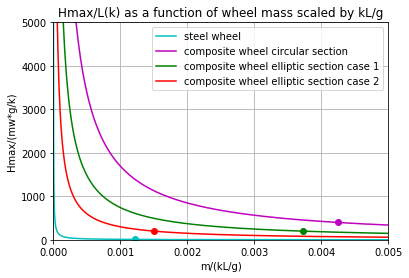

In [94]:
plt.plot(mx2/(kac*L/g),Hmaxmac(mx2)*(kac/(mr(rhoa,Ac)*g)),'c',label='steel wheel')
plt.plot(mx2/(kcc*L/g),Hmaxmcc(mx2)*(kcc/(mr(rhoc,Ac)*g)),'m',label='composite wheel circular section')
plt.plot(mx2/(kce1*L/g),Hmaxmce1(mx2)*(kce1/(mr(rhoc,Ae)*g)),'g',label='composite wheel elliptic section case 1')
plt.plot(mx2/(kce2*L/g),Hmaxmce2(mx2)*(kce2/(mr(rhoc,Ae)*g)),'r',label='composite wheel elliptic section case 2')

plt.plot(mr(rhoa,Ac)/(kac*L/g),Hmax(W,kac,mr(rhoa,Ac))*(kac/(mr(rhoa,Ac)*g)),'co')
plt.plot(mr(rhoc,Ac)/(kcc*L/g),Hmax(W,kcc,mr(rhoc,Ac))*(kcc/(mr(rhoc,Ac)*g)),'mo')
plt.plot(mr(rhoc,Ae)/(kce1*L/g),Hmax(W,kce1,mr(rhoc,Ae))*(kce1/(mr(rhoc,Ae)*g)),'go')
plt.plot(mr(rhoc,Ae)/(kce2*L/g),Hmax(W,kce2,mr(rhoc,Ae))*(kce2/(mr(rhoc,Ae)*g)),'ro')

plt.xlim((0,0.005))
plt.ylim((0,5000))

plt.xlabel('m/(kL/g)')
plt.ylabel('Hmax/(mw*g/k)')
plt.legend(loc='best')
plt.title('Hmax/L(k) as a function of wheel mass scaled by kL/g')
plt.grid()
plt.show()

# $\frac{E_{p,gravitationnelle}}{E_{tot}}$ en fonction de la force appliquée (ADIMENSIONNEL)

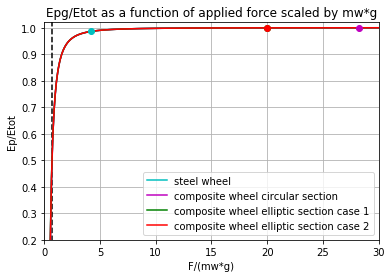

In [95]:
plt.plot(Fx2/(mr(rhoa,Ac)*g),fEpgFac(Fx2),'c',label='steel wheel')
plt.plot(Fx2/(mr(rhoc,Ac)*g),fEpgFcc(Fx2),'m',label='composite wheel circular section')
plt.plot(Fx2/(mr(rhoc,Ae)*g),fEpgFce1(Fx2),'g',label='composite wheel elliptic section case 1')
plt.plot(Fx2/(mr(rhoc,Ae)*g),fEpgFce2(Fx2),'r',label='composite wheel elliptic section case 2')


plt.plot(W/(mr(rhoa,Ac)*g),fEpg(W,kac,mr(rhoa,Ac)),'co')
plt.plot(W/(mr(rhoc,Ac)*g),fEpg(W,kcc,mr(rhoc,Ac)),'mo')
plt.plot(W/(mr(rhoc,Ae)*g),fEpg(W,kce1,mr(rhoc,Ae)),'go')
plt.plot(W/(mr(rhoc,Ae)*g),fEpg(W,kce2,mr(rhoc,Ae)),'ro')

plt.vlines(1/np.sqrt(2),-100.0,2.0, 'k',linestyle='--')

plt.xlim((0,30))
plt.ylim((0.2,1.02))

plt.xlabel('F/(mw*g)')
plt.ylabel('Ep/Etot')
plt.legend(loc='best')
plt.title('Epg/Etot as a function of applied force scaled by mw*g')
plt.grid()
plt.show()

# $\frac{E_{p,gravitationnelle}}{E_{tot}}$ en fonction de la masse de la roue (ADIMENSIONNEL)

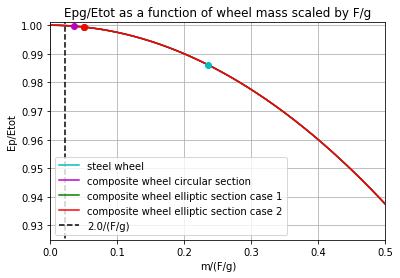

In [96]:
plt.plot(mx2/(W/g),fEpgmac(mx2),'c',label='steel wheel')
plt.plot(mx2/(W/g),fEpgmcc(mx2),'m',label='composite wheel circular section')
plt.plot(mx2/(W/g),fEpgmce1(mx2),'g',label='composite wheel elliptic section case 1')
plt.plot(mx2/(W/g),fEpgmce1(mx2),'r',label='composite wheel elliptic section case 2')


plt.plot(mr(rhoa,Ac)/(W/g),fEpg(W,kac,mr(rhoa,Ac)),'co')
plt.plot(mr(rhoc,Ac)/(W/g),fEpg(W,kcc,mr(rhoc,Ac)),'mo')
plt.plot(mr(rhoc,Ae)/(W/g),fEpg(W,kce1,mr(rhoc,Ae)),'go')
plt.plot(mr(rhoc,Ae)/(W/g),fEpg(W,kce2,mr(rhoc,Ae)),'ro')

plt.vlines(2.0/(W/g),-0.1,6.0,'k',linestyle='--',label='2.0/(F/g)')

plt.xlim((0,0.5))
plt.ylim((0.925,1.001))

plt.xlabel('m/(F/g)')
plt.ylabel('Ep/Etot')
plt.legend(loc='best')
plt.title('Epg/Etot as a function of wheel mass scaled by F/g')
plt.grid()
plt.show()

# Étude de la stabilité
<br>
Les cartes de stabilités sont déterminées par les paramètres géométriques a et h:

<img src="https://i.ibb.co/9wZ4KTx/A.png" width="600" height="300">


In [98]:
a=0.955
h=0.0175

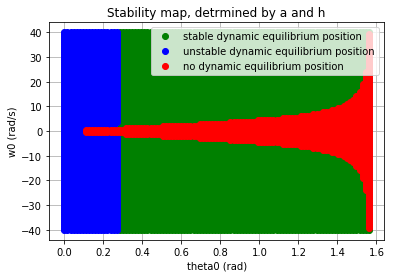

In [99]:
g=9.81

def omega02(x,rc):
    return((g*(a*ma.tan(x)-h*ma.copysign(1,x)))/(ma.cos(x)*((a**2*0.25+h**2/3)*ma.tan(x)-a*h*ma.copysign(1,x))+(1.5*a+h*(ma.copysign(1,x))*ma.tan(x))*rc))


def w2(x,rc):
    w30=ma.cos(x)*omega02(x,rc)
    w20=(h*ma.copysign(1,x)*ma.cos(x)-rc)*omega02(x,rc)/a
    P22=36*(3*a+2*h*ma.copysign(1,x)*ma.tan(x))
    P23=-6*(4*h*ma.copysign(1,x)*(3*a**2+8*h**2)*ma.tan(x)**2+a*(15*a**2+56*h**2)*ma.tan(x)+2*h*ma.copysign(1,x)*(15*a**2+8*h**2))
    P33=3*(3*a**2+16*h**2)*(3*a**2+8*h**2)*ma.tan(x)**2+8*a*h*(15*a**2+44*h**2)*ma.tan(x)+45*a**4+216*a**2*h**2+128*h**4

    return(((a**3*P22*w20**2+a*P23*w20*w30+P33*w30**2)*ma.sqrt(1+ma.tan(x)**2)-12*g*(3*a**2+8*h**2)*(a+h*ma.copysign(1,x)*ma.tan(x)))/((3*a**2+8*h**2)*(15*a**2+56*h**2)*ma.sqrt(1+ma.tan(x)**2)))


x=np.linspace(0.0,ma.pi/2 - 0.01, 100)
omega0=np.linspace(-40.0,40.0,100)

xst=[]
xinst=[]
xind=[]

Omega0st=[]
Omega0inst=[]
Omega0ind=[]

w0st=[]
w0inst=[]
w0ind=[]

def delta(th,w0):
    k12 = 5 / 8 * h ** 2 + 0.5 * (a - h) ** 2
    k22 = (a - h) ** 2 + 3 / 4 * h ** 2
    coa = (k22 - k12 + (a - h) ** 2) * np.sin(th) * np.cos(th)
    cob = (k22 * w0+(a-h)*a*w0)*np.cos(th)
    coc=(a-h)*np.sin(th)*g
    res=cob**2-4*coa*coc
    return(res)


for i in range(len(x)):
    for j in range(len(omega0)):


        if delta(x[i],omega0[j])>=0 and w2(x[i],omega0[j])>0:
            xst.append(x[i])
            w0st.append(omega0[j])

        elif delta(x[i],omega0[j])>=0 and w2(x[i],omega0[j])<0:
            xind.append(x[i])
            w0ind.append(omega0[j])

        else:
            xinst.append(x[i])
            w0inst.append(omega0[j])

plt.plot(xst,w0st,'go',label='stable dynamic equilibrium position')
plt.plot(xind,w0ind,'bo',label='unstable dynamic equilibrium position')
plt.plot(xinst,w0inst,'ro',label='no dynamic equilibrium position')

plt.legend(loc='best')
plt.xlabel('theta0 (rad)')
plt.ylabel('w0 (rad/s)')
plt.title('Stability map, detrmined by a and h')

plt.grid()
plt.show()

